In [85]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from datetime import datetime
%matplotlib inline

In [86]:
# Load data
Boston_calendar = pd.read_csv('Boston Airbnb/calendar.csv')
Seattle_calendar = pd.read_csv('Seattle Airbnb/calendar.csv')
Boston_listings = pd.read_csv('Boston Airbnb/listings.csv')
Seattle_listings = pd.read_csv('Seattle Airbnb/listings.csv')

Question 1: Compare Boston and Seattle Airbnb price and find the most common price range

#Seattle Airbnb price range 

In [87]:
#Clean data
Seattle_price = Seattle_calendar[['listing_id','price']].drop_duplicates().dropna()
func = lambda x: x[1:].replace(',','')
Seattle_price = Seattle_price['price'].apply(func).astype(float)
#Analyse data
prices = [0,100,200,300,500,1000,Seattle_price.max()]
Seattle_price_pattern = pd.cut(Seattle_price, prices)
Seattle_price_pattern = pd.value_counts(Seattle_price_pattern)
print(Seattle_price_pattern)

(100.0, 200.0]      10926
(0.0, 100.0]         7959
(200.0, 300.0]       4330
(300.0, 500.0]       2524
(500.0, 1000.0]       429
(1000.0, 1650.0]        6
Name: price, dtype: int64


#Boston Airbnb price range

In [88]:
#Clean data
Boston_price = Boston_calendar[['listing_id','price']].drop_duplicates().dropna()
func = lambda x: x[1:].replace(',','')
Boston_price = Boston_price['price'].apply(func).astype(float)
#Analyse data
prices = [0,100,200,300,500,1000,Boston_price.max()]
Boston_price_pattern = pd.cut(Boston_price, prices)
Boston_price_pattern = pd.value_counts(Boston_price_pattern)
print(Boston_price_pattern)
price_range_Boston = Boston_price_pattern.index
amount = Boston_price_pattern.values

(100.0, 200.0]      8589
(300.0, 500.0]      8563
(200.0, 300.0]      7793
(500.0, 1000.0]     4790
(0.0, 100.0]        3435
(1000.0, 7163.0]     513
Name: price, dtype: int64


<ipython-input-89-6111bc0bae8e>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['below 100','100-200','200-300','300-500','500-1000','above 1000'])
<ipython-input-89-6111bc0bae8e>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['below 100','100-200','200-300','300-500','500-1000','above 1000'])


Text(0.5, 1.0, 'Seattle_Airbnb_price')

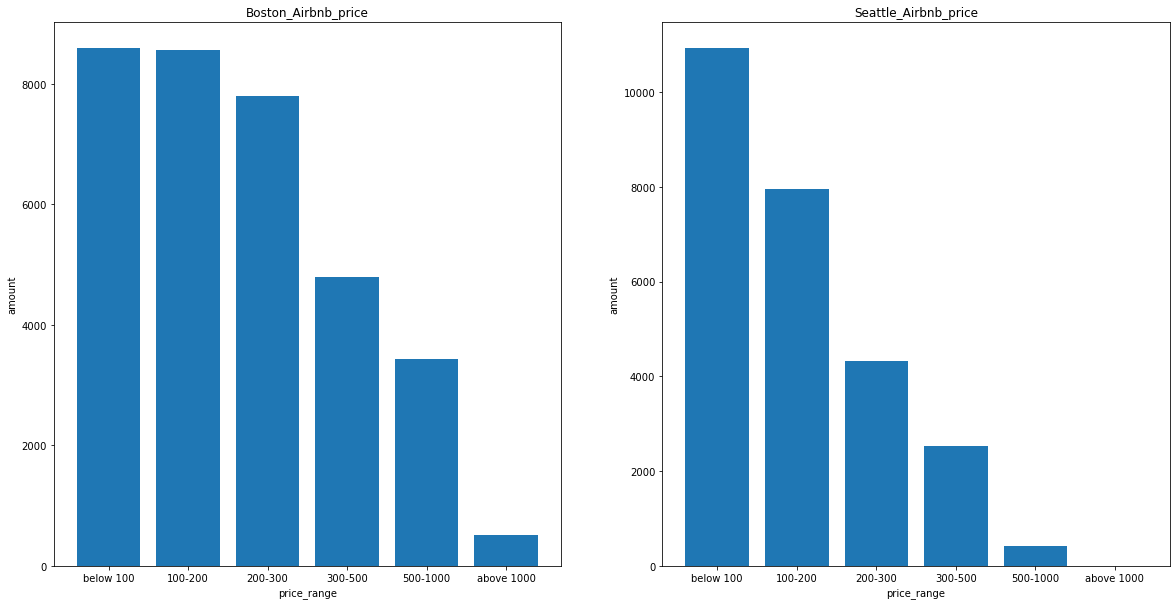

In [89]:
# visualize Boston and Seattle Airbnb price
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(1,2,1)
ax1.bar(Boston_price_pattern.index.astype('str'),Boston_price_pattern.values)
ax1.set_xlabel('price_range')
ax1.set_ylabel('amount')
ax1.set_xticklabels(['below 100','100-200','200-300','300-500','500-1000','above 1000'])
ax1.set_title('Boston_Airbnb_price')
ax2 = fig.add_subplot(1,2,2)
ax2.bar(Seattle_price_pattern.index.astype('str'),Seattle_price_pattern.values)
ax2.set_xlabel('price_range')
ax2.set_ylabel('amount')
ax2.set_xticklabels(['below 100','100-200','200-300','300-500','500-1000','above 1000'])
ax2.set_title('Seattle_Airbnb_price')

2. Build model to predict review_scores_rating

<AxesSubplot:>

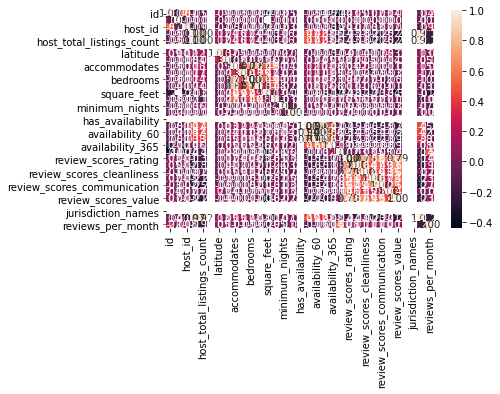

In [90]:
sns.heatmap(Boston_listings.corr(), annot=True, fmt=".2f")

In [91]:
# Build model to predict review_scores_rating
Boston_listings_new = Boston_listings[['review_scores_rating','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']].dropna()
X = Boston_listings_new[['review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value']]
y = Boston_listings_new['review_scores_rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)
lm_model = LinearRegression(normalize=True)
lm_model.fit(X_train, y_train) 

LinearRegression(normalize=True)

In [92]:
# Test model
y_pred =lm_model.predict(X_test)
print('r2_score= ', r2_score(y_test.values,y_pred))
print('mean_squared_error= ', mean_squared_error(y_test.values,y_pred))

r2_score=  0.711550954843015
mean_squared_error=  27.523603293962353


3. Top 5 Airbnb earning in 2017 Jan

In [93]:
# Wrangling Data
Boston_booked = Boston_calendar[Boston_calendar['available']=='t']
Seattle_booked = Seattle_calendar[Seattle_calendar['available']=='t']

In [94]:
Boston_booked['date']= pd.to_datetime(Boston_booked['date']) 
Seattle_booked['date']= pd.to_datetime(Seattle_booked['date']) 


<ipython-input-94-84c0c79e0998>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boston_booked['date']= pd.to_datetime(Boston_booked['date'])
<ipython-input-94-84c0c79e0998>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Seattle_booked['date']= pd.to_datetime(Seattle_booked['date'])


In [95]:
Boston_booked_2017 = Boston_booked[pd.DatetimeIndex(Boston_booked['date']).year==2017]
Boston_booked_2017_Jan = Boston_booked_2017[pd.DatetimeIndex(Boston_booked_2017['date']).month==1]
Seattle_booked_2017 = Seattle_booked[pd.DatetimeIndex(Seattle_booked['date']).year==2017]
Seattle_booked_2017_Jan = Seattle_booked_2017[pd.DatetimeIndex(Seattle_booked_2017['date']).month==1]
func = lambda x: x[1:].replace(',','')
Boston_booked_2017_Jan['price']= Boston_booked_2017_Jan['price'].apply(func).astype(float)
Seattle_booked_2017_Jan['price']= Seattle_booked_2017_Jan['price'].apply(func).astype(float)

<ipython-input-95-6653cdf1f976>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Boston_booked_2017_Jan['price']= Boston_booked_2017_Jan['price'].apply(func).astype(float)


In [96]:
Boston_booked_2017_Jan = Boston_booked_2017_Jan.groupby('listing_id')['price'].sum()
Seattle_booked_2017_Jan = Seattle_booked_2017_Jan.groupby('listing_id')['price'].sum()

In [97]:
Boston_top_earning = Boston_booked_2017_Jan.sort_values(ascending=False)[:6]
Seattle_top_earning = Seattle_booked_2017_Jan.sort_values(ascending=False)[:6]

In [98]:
print('Boston_top5_earning', Boston_top_earning.values)
print('Seattle_top_earning', Seattle_top_earning.values)

Boston_top5_earning [124000.  41695.  40300.  38285.  31000.  30969.]
Seattle_top_earning [2000. 2000. 1950. 1900. 1800. 1798.]
